In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [9]:
encoded = pd.read_csv('dataset1.csv')
core = pd.read_csv('dataset2.csv')

In [10]:
encoded.head()

,Unnamed: 0,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [11]:
core.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [16]:
y = core['Class']
y.head()
y.dtype
y=y.to_numpy()

dtype('int64')

In [20]:
type(y)


numpy.ndarray

In [22]:
std_features = StandardScaler().fit(encoded).transform(encoded)
std_features[0:3]

array([[-1.71291154e+00, -1.71291154e+00, -1.94814463e-16,
        -6.53912840e-01, -1.57589457e+00, -9.73440458e-01,
        -1.05999788e-01, -1.05999788e-01, -6.54653671e-01,
        -1.05999788e-01, -5.51677284e-01,  3.44342023e+00,
        -1.85695338e-01, -3.33333333e-01, -1.05999788e-01,
        -2.42535625e-01, -4.29197538e-01,  7.97724035e-01,
        -5.68796459e-01, -4.10890702e-01, -4.10890702e-01,
        -1.50755672e-01, -7.97724035e-01, -1.50755672e-01,
        -3.92232270e-01,  9.43398113e+00, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.50755672e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.50755672e-0

In [26]:
print(encoded.head())
print(std_features[0:10])

   Unnamed: 0  FlightNumber  PayloadMass  Flights  Block  ReusedCount  \
0           0           1.0  6104.959412      1.0    1.0          0.0   
1           1           2.0   525.000000      1.0    1.0          0.0   
2           2           3.0   677.000000      1.0    1.0          0.0   
3           3           4.0   500.000000      1.0    1.0          0.0   
4           4           5.0  3170.000000      1.0    1.0          0.0   

   Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  ...  Serial_B1058  \
0          0.0        0.0        0.0        0.0  ...           0.0   
1          0.0        0.0        0.0        0.0  ...           0.0   
2          0.0        0.0        0.0        0.0  ...           0.0   
3          0.0        0.0        0.0        0.0  ...           0.0   
4          0.0        0.0        1.0        0.0  ...           0.0   

   Serial_B1059  Serial_B1060  Serial_B1062  GridFins_False  GridFins_True  \
0           0.0           0.0           0.0             1.0   

In [27]:
std_features.shape

(90, 84)

In [28]:
encoded.shape

(90, 84)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(std_features, y, test_size=0.2, random_state=1234)
print("the size of training set is: ", x_train.shape, y_train.shape)
print("the size of training set is: ", x_test.shape, y_test.shape)

the size of training set is:  (72, 84) (72,)
the size of training set is:  (18, 84) (18,)


In [31]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [32]:
model = LogisticRegression()
grid1 = GridSearchCV(model, parameters, cv=4, refit=True)
grid1.fit(x_train, y_train)
best_parameter = grid1.best_params_
best_score = grid1.best_score_

print("the best parameter is :",  best_parameter, " the best score is: ", best_score)

the best parameter is : {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}  the best score is:  0.8333333333333334


In [44]:
prediction = grid1.predict(x_test)
print(prediction)
print("the squared erro is: ", mean_squared_error(y_test, prediction))
print(classification_report(y_test, prediction))
print("the accuracy of the model is: ", accuracy_score(y_test, prediction)*100, '%')

[1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1]
the squared erro is:  0.16666666666666666
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.79      1.00      0.88        11

    accuracy                           0.83        18
   macro avg       0.89      0.79      0.80        18
weighted avg       0.87      0.83      0.82        18

the accuracy of the model is:  83.33333333333334 %


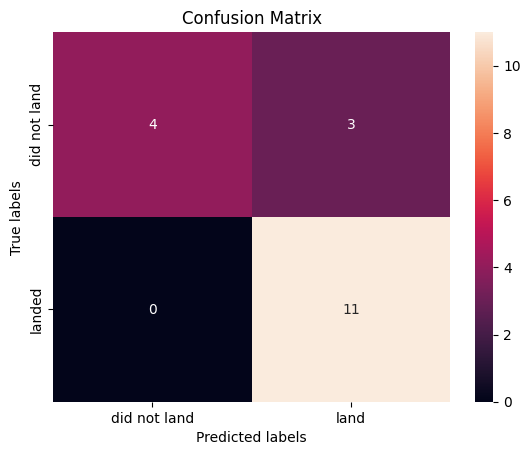

In [39]:
plot_confusion_matrix(y_test,prediction)

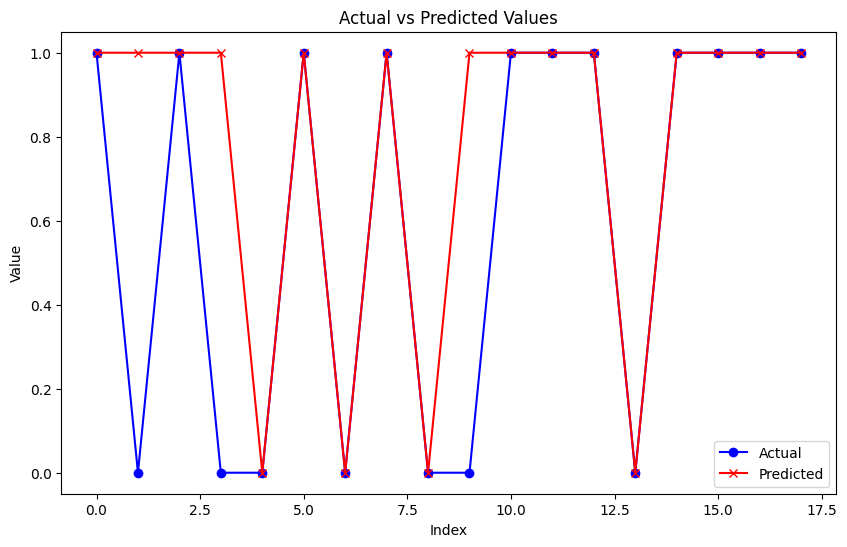

In [63]:
import matplotlib.pyplot as plt

prediction = grid1.predict(x_test)
plt.figure(figsize=(10, 6))


plt.plot(y_test, label='Actual', color='blue', marker='o')

plt.plot(prediction, label='Predicted', color='red', marker='x')


plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')

plt.legend()

plt.show()

In [33]:
parameters2 = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
grid2 = GridSearchCV(svm, parameters2, cv=4, refit=True)
grid2.fit(x_train, y_train)
best_parameter = grid2.best_params_
best_score = grid2.best_score_

print("the best parameter is :",  best_parameter, " the best score is: ", best_score)

the best parameter is : {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}  the best score is:  0.861111111111111


[1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1]
the report of the model:                precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.79      1.00      0.88        11

    accuracy                           0.83        18
   macro avg       0.89      0.79      0.80        18
weighted avg       0.87      0.83      0.82        18

the accuracy of the model is:  83.33333333333334 %


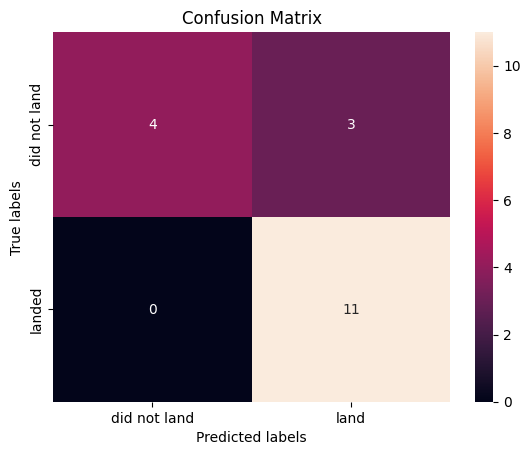

In [46]:
prediction1 = grid2.predict(x_test)
print(prediction1)
print("the report of the model: ", classification_report(y_test, prediction1))
print("the accuracy of the model is: ", accuracy_score(y_test, prediction1)*100, '%')
plot_confusion_matrix(y_test,prediction1)

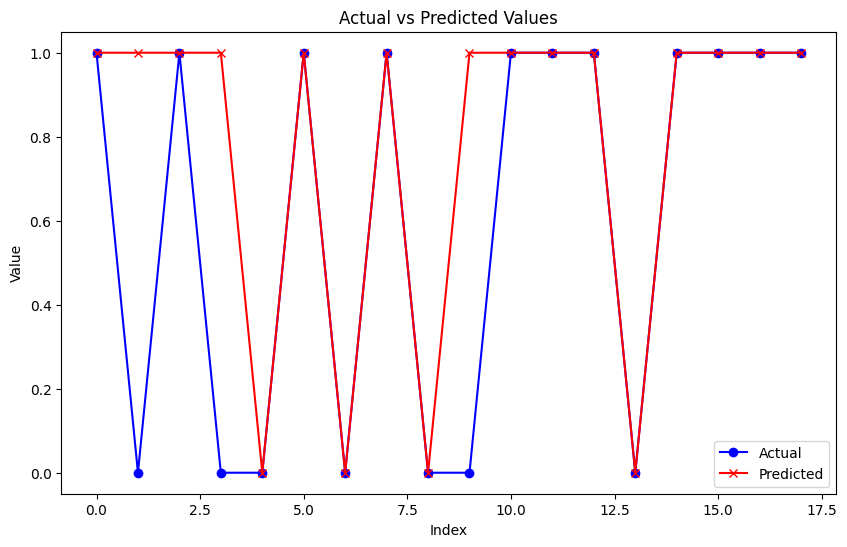

In [64]:
import matplotlib.pyplot as plt

prediction2 = grid2.predict(x_test)
plt.figure(figsize=(10, 6))


plt.plot(y_test, label='Actual', color='blue', marker='o')

plt.plot(prediction2, label='Predicted', color='red', marker='x')


plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')

plt.legend()

plt.show()

In [57]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
grid3 = GridSearchCV(tree, parameters, cv=5, refit=True)

grid3.fit(x_train, y_train)

best_parameter3 = grid3.best_params_
best_score3 = grid3.best_score_

print("the best parameter is :",  best_parameter3, " the best score is: ", best_score3)

the best parameter is : {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}  the best score is:  0.900952380952381


Prediction 3: [1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0]
the model report is as follows:                precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.82      0.82      0.82        11

    accuracy                           0.78        18
   macro avg       0.77      0.77      0.77        18
weighted avg       0.78      0.78      0.78        18

the model accuracy is as follows:  0.7777777777777778


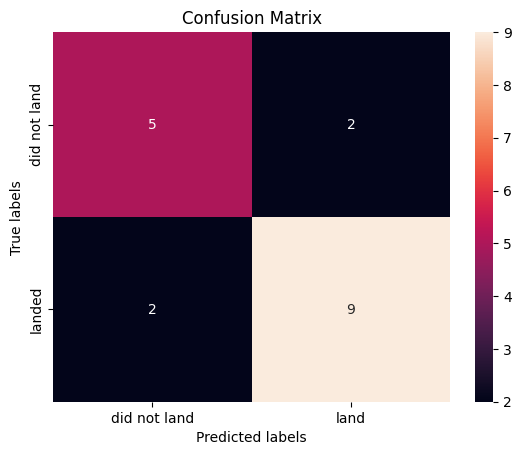

In [58]:
prediction3 = grid3.predict(x_test)
print("Prediction 3:", prediction3)
print("the model report is as follows: ", classification_report(y_test, prediction3))
print("the model accuracy is as follows: ", accuracy_score(y_test, prediction3))

plot_confusion_matrix(y_test, prediction3)

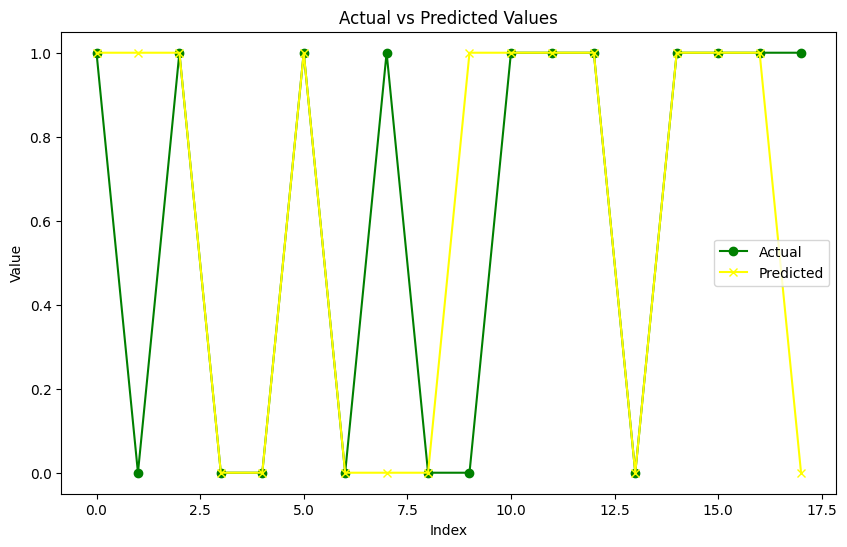

In [65]:
import matplotlib.pyplot as plt

prediction3 = grid3.predict(x_test)
plt.figure(figsize=(10, 6))


plt.plot(y_test, label='Actual', color='green', marker='o')

plt.plot(prediction3, label='Predicted', color='yellow', marker='x')


plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')

plt.legend()

plt.show()

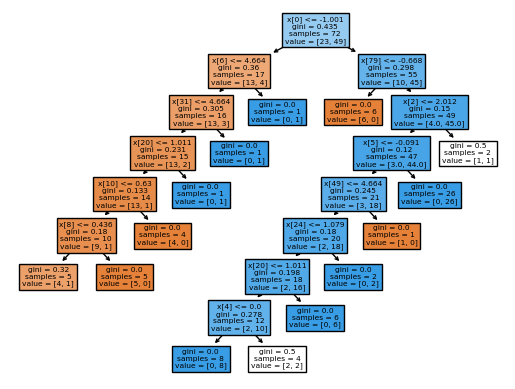

In [59]:
import sklearn.tree as tree
tree.plot_tree(grid3.best_estimator_, filled=True)
plt.show()

In [60]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
Best Cross-Validation Score:  0.8742857142857142
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.73      1.00      0.85        11

    accuracy                           0.78        18
   macro avg       0.87      0.71      0.72        18
weighted avg       0.84      0.78      0.75        18



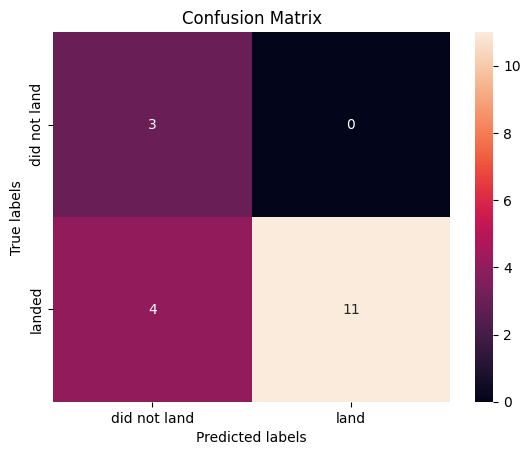

In [66]:
grid_search_knn = GridSearchCV(KNN, parameters, cv=5, refit=True)


grid_search_knn.fit(x_train, y_train)

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best Parameters: ", best_params_knn)
print("Best Cross-Validation Score: ", best_score_knn)

y_pred = grid_search_knn.predict(x_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_pred, prediction3)

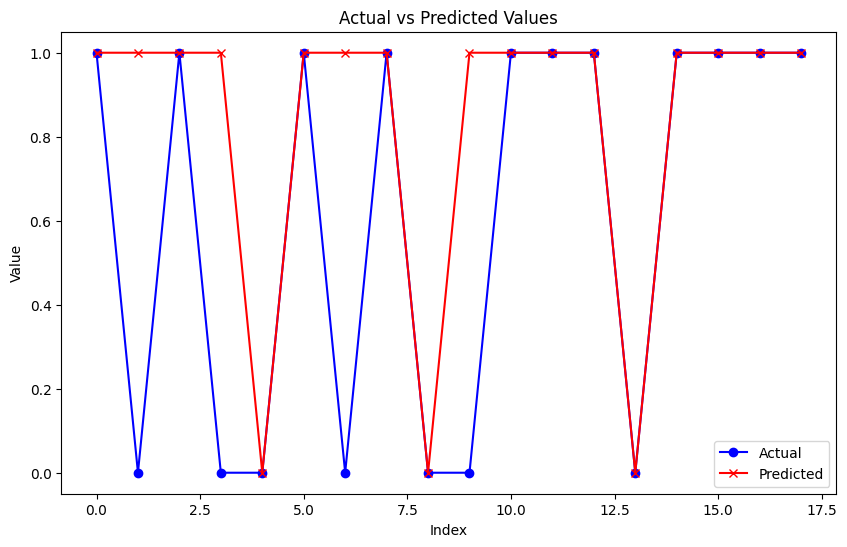

In [62]:
import matplotlib.pyplot as plt


y_pred = grid_search_knn.predict(x_test)  

plt.figure(figsize=(10, 6))


plt.plot(y_test, label='Actual', color='blue', marker='o')

plt.plot(y_pred, label='Predicted', color='red', marker='x')


plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')

plt.legend()

plt.show()